#### Import homegrown OLS function

In [7]:
from Linear_Model_Creation_Function import OLS_Model_Creation

lin_reg, X_train, X_test, y_train, y_test = OLS_Model_Creation(path = './data/kaggle/created/homes_grouped.csv') 


#### Check model Results

In [8]:
import pandas as pd
import numpy as np

print(f'ordinary linear regression score on the training data: {lin_reg.score(X_train, y_train)}', '\n')  
print(f'ordinary linear regression score on the test data: {lin_reg.score(X_test, y_test)}', '\n')  
print(f'ordinary linear regression intercept: {np.exp(lin_reg.intercept_) }', '\n')
coefficients = pd.DataFrame(np.exp(lin_reg.coef_), X_train.columns, columns = ['Coefficients']).sort_values(by = 'Coefficients', ascending = False)   
coefficients['Percent_Change'] = 100 * (coefficients['Coefficients'] - 1)
print('Head \n', coefficients.head(15), '\n')
print('Tail \n', coefficients.tail(3), '\n')

ordinary linear regression score on the training data: 0.9132498746409691 

ordinary linear regression score on the test data: 0.8759953091380099 

ordinary linear regression intercept: 564336.1436067319 

Head 
                           Coefficients  Percent_Change
Neighborhood_StoneBr          1.183919       18.391910
Neighborhood_Crawfor          1.181905       18.190471
Neighborhood_NridgHt          1.170542       17.054232
Neighborhood_NoRidge          1.157907       15.790661
Neighborhood_Somerst          1.122865       12.286522
Neighborhood_Veenker          1.116696       11.669635
Neighborhood_ClearCr          1.105354       10.535401
GarageType_Attchd             1.095124        9.512379
GarageType_Detchd             1.077448        7.744760
Neighborhood_Timber           1.071206        7.120564
BsmtFinType2_No_basement      1.070275        7.027495
GarageCars                    1.069320        6.932018
GarageType_BuiltIn            1.067460        6.746020
BsmtExposure_Gd  

In [3]:
def R_stats_P_values(X_data, y_data, transformation_method = 'linear'):
    '''
    Transformation method can be linear or log transformation
    '''
    if transformation_method == 'linear':
        import statsmodels.api as sm
        x = sm.add_constant(X_data)
        model = sm.OLS(y_data, x)
        results = model.fit()
        pValues = results.pvalues
        return pValues
    else:
        import statsmodels.api as sm
        x = sm.add_constant(X_data)
        model = sm.OLS(np.log(y_data), x)
        results = model.fit()
        pValues = results.pvalues
        return pValues

    
P_values = R_stats_P_values(X_train, y_train)
P_values

const                                    2.334918e-02
MSSubClass                               6.807727e-03
LotFrontage                              6.666029e-01
LotArea                                  1.626867e-01
OverallQual                              9.315944e-13
                                             ...     
RoofStyle_group_Shed/Flat/Hip/Mansard    2.348827e-01
SaleCondition_group_Normal/Alloca        2.132633e-01
SaleCondition_group_Nothing              2.176877e-01
SaleCondition_group_Parital              5.582789e-02
SaleType_group_Other                     2.750196e-01
Length: 143, dtype: float64

In [2]:
def R_stats_printout(X_data, y_data, transformation_method = 'linear'):
    '''
    Transformation method can be linear or log transformation
    '''
    if transformation_method == 'linear':
        import statsmodels.api as sm
        x = sm.add_constant(X_data)
        model = sm.OLS(y_data, x)
        results = model.fit()
        print(results.summary())
    else:
        import statsmodels.api as sm
        x = sm.add_constant(X_data)
        model = sm.OLS(np.log(y_data), x)
        results = model.fit()
        print(results.summary())
    

R_stats_printout(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     73.52
Date:                Fri, 29 May 2020   Prob (F-statistic):               0.00
Time:                        18:30:15   Log-Likelihood:                 860.94
No. Observations:                1156   AIC:                            -1452.
Df Residuals:                    1021   BIC:                            -769.8
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [5]:
predictions = lin_reg.predict(X_test)
comparison = pd.DataFrame({'Actual': np.exp(y_test), 'Predictions': np.exp(predictions)})
comparison.head(5)  

,Actual,Predictions
875,303477.0,346347.168330
1024,287000.0,278367.645124
1072,91500.0,112103.346575
541,248000.0,269729.139913
1220,115000.0,104983.006393


ValueError: x and y must be the same size

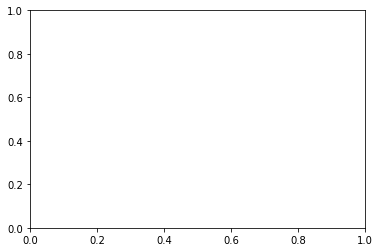

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_test, y_test, c = 'b')
# plt.plot(x_data, ols.predict(x_data))
